In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib
import matplotlib.font_manager as font_manager

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Helvetica') 

/var/folders/jq/7npv56h546d1h_y9pnzpz4k80000gp/T/ipykernel_23235/2925834963.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


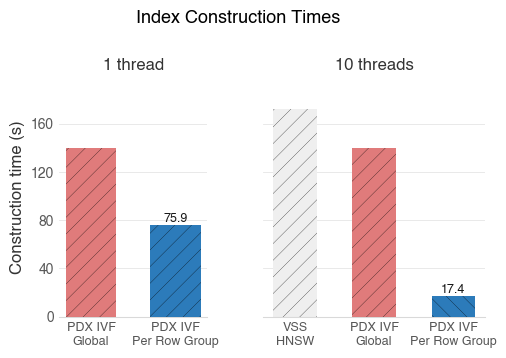

In [3]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data

# Query time data (FAISS, PDXearch)
data = {
    "1 thread": [
        139.7, 75.94
    ],
    "10 threads": [
        172.0, 139.7, 17.4
    ],
    # "K=100@0.99": [
    #     4.97, 11.57, 52.56, 96.24
    # ]
}

categories = [
    ["PDX IVF\nGlobal", "PDX IVF\nPer Row Group"],
    ["VSS\nHNSW", "PDX IVF\nGlobal", "PDX IVF\nPer Row Group"]
]
colors = [
    ["#e07b7b", "#2c7bba", "#efefef", "#efefef"],
    ["#efefef", "#e07b7b", "#2c7bba", "#efefef", "#efefef"]
]
hatches = ["//", "//", "\\\\", "\\\\"]

# fig, axes = plt.subplots(1, 2, figsize=(8.1, 3.1), sharey=False, tight_layout=True)

fig, axes = plt.subplots(
    1, 2, figsize=(5.5, 3.1), sharey=True, 
    # tight_layout=True,
    gridspec_kw={'width_ratios': [1, 1.5], 'wspace': 0.3}
)

label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 9
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for k, (ax, (title, values)) in enumerate(zip(axes, data.items())):
    bar_width = 0.55
    if len(categories[k]) == 2:
        bar_width = 0.6
    bars = []
    for i in range(len(categories[k])):
        bar = ax.bar(categories[k][i], values[i], width=bar_width, color=colors[k][i], hatch=hatches[i], label=categories[k][i])
        bars.append(bar)

    x_labels = categories[k]
    x = np.arange(len(x_labels))
    
    # Add value labels on top
    for bar_group in bars[len(categories[k])-1:]:
        bar = bar_group[0]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f"{height:.1f}", ha='center', va='bottom', fontsize=9, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(title, fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "1 thread":
        ax.set_ylabel("Construction time (s)", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(values)
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=4, frameon=False, fontsize=8, bbox_to_anchor=(0.5, -0.1))
fig.suptitle('Index Construction Times', fontsize=13, x=0.45, y=1.1)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./openai-fvss-construction.png', format='png', dpi=600, bbox_inches='tight')

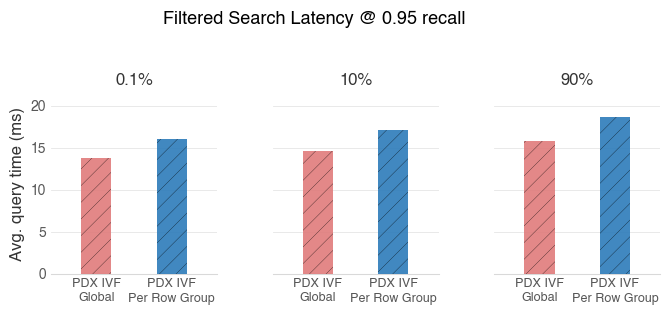

In [4]:
mpl.rcParams['hatch.linewidth'] = 0.2

# Data

# Query time data (FAISS, PDXearch)
data = {
    "0.1%": [
        13.75, 16.0
    ],
    "10%": [
        14.56, 17.14
    ],
    # "5%": [
    #     0.01509, 0.01845
    # ],
    "90%": [
        15.8, 18.64
    ],
    # "99%": [
    #     0.01612, 0.01962
    # ],
}

categories = [
    ["PDX IVF\nGlobal", "PDX IVF\nPer Row Group"],
]
colors = [
    ["#e07b7b", "#2c7bba", "#efefef", "#efefef"],
    # ["#efefef", "#e07b7b", "#2c7bba", "#efefef", "#efefef"]
]
hatches = ["//", "//", "\\\\", "\\\\"]

# fig, axes = plt.subplots(1, 2, figsize=(8.1, 3.1), sharey=False, tight_layout=True)

fig, axes = plt.subplots(
    1, 3, figsize=(7.1, 3.1), sharey=True, 
    tight_layout=True,
    # gridspec_kw={'width_ratios': [1, 1.5], 'wspace': 0.3}
)

label_fontsize = 12
tick_fontsize = 10
x_tick_fontsize = 9
bar_label_fontsize = 9
font_color = "#333333"
tick_fonts_color = '#585858'
bar_text_color = '#191919'

for k, (ax, (title, values)) in enumerate(zip(axes, data.items())):
    bar_width = 0.4
    # if len(categories[0]) == 2:
    #     bar_width = 0.6
    bars = []
    for i in range(len(categories[0])):
        bar = ax.bar(categories[0][i], values[i],  alpha=0.9,  width=bar_width, color=colors[0][i], hatch=hatches[i], label=categories[0][i], align='center')
        bars.append(bar)

    x_labels = categories[0]
    x = np.arange(len(x_labels))
    
    # # Add value labels on top
    # for bar_group in bars[:]:
    #     bar = bar_group[0]
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width()/2, height + 0.1,
    #             f"{height:.1f}", ha='center', va='bottom', fontsize=9, color=bar_text_color)
    
    # Ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=x_tick_fontsize, color=tick_fonts_color)
    ax.set_title(f"{title}", fontsize=label_fontsize, color=font_color)
    
    # Grids (horizontal only)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='gray', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Spine adjustments (remove top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color((0, 0, 0, 0.15))

    # Y label only for first plot
    if title == "0.1%":
        ax.set_ylabel("Avg. query time (ms)", fontsize=label_fontsize, color=font_color)

    # Set consistent Y limits per dataset
    max_y = max(values)
    ax.set_ylim(0, max_y * 1.15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.tick_params(axis='y', colors=tick_fonts_color)
    ax.tick_params(axis='both', length=0)
    ax.set_xlim(x[0] - 0.6, x[-1] + 0.6)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower center", ncol=4, frameon=False, fontsize=8, bbox_to_anchor=(0.5, -0.1))
fig.suptitle('Filtered Search Latency @ 0.95 recall', fontsize=13, x=0.45, y=1.0)
fig.subplots_adjust(wspace=4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'./openai-fvss.png', format='png', dpi=600, bbox_inches='tight')